In [ ]:
# Importamos las bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# URL en formato RAW
url= "https://raw.githubusercontent.com/Ferlinn95/Computacional-I/master/Actividad%201/Climatologia.csv"

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
#Nota: Recuerda que la Columna 'Mes' la queremos con el nombre abreviado del mes, por lo que utilizamos la función df.dt.strftime('%b')
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   4041 non-null   datetime64[ns]
 1   Precip  4040 non-null   float64       
 2   Evap    2563 non-null   float64       
 3   Tmax    4024 non-null   float64       
 4   Tmin    4040 non-null   float64       
 5   Año     4041 non-null   int64         
 6   Mes     4041 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 221.1+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1977-08-01     0.0  11.5  40.0  27.0  1977  Aug
1 1977-08-02     0.0  10.9  39.0  27.0  1977  Aug
2 1977-08-03     0.0  11.5  42.0  25.0  1977  Aug
3 1977-08-04     0.0  11.5  43.0  24.0  1977  Aug
4 1977-08-05     0.0  10.8  43.0  24.0  1977  Aug
          Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
4036 2004-12-27     0.0   NaN  22.0   6.0  2004  Dec
4037 2004

In [ ]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Remplazamos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

# Seleccionaremos un conjunto de años de 27 años  
df_15 = df_meteo_ts[(df_meteo_ts['Año'] >= 1977) & (df_meteo_ts['Año'] < 1992)]
df_15_2 = df_meteo_ts[(df_meteo_ts['Año'] >= 1992) & (df_meteo_ts['Año'] < 2004)]
df_T = df_meteo_ts[(df_meteo_ts['Año'] >= 1977) & (df_meteo_ts['Año'] < 2004)]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4041 entries, 1977-08-01 to 2004-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  4040 non-null   float64
 1   Evap    2563 non-null   float64
 2   Tmax    4024 non-null   float64
 3   Tmin    4040 non-null   float64
 4   Año     4041 non-null   int64  
 5   Mes     4041 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 221.0+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1977-08-01     0.0  11.5  40.0  27.0  1977  Aug
1977-08-02     0.0  10.9  39.0  27.0  1977  Aug
1977-08-03     0.0  11.5  42.0  25.0  1977  Aug
1977-08-04     0.0  11.5  43.0  24.0  1977  Aug
1977-08-05     0.0  10.8  43.0  24.0  1977  Aug
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2004-12-27     0.0   NaN  22.0   6.0  2004  Dec
2004-12-28     0.0   NaN  21.0   8.0

#**NOTA**
Llame **T** a mi tiempo total de 27 años, **15** corresponde a los primeros años de los datos y el **15_2**corresponde a la segunda mitad de los años que se tomaron los datos, como se puede ver mas adelante en la grafica hay datos faltantes.
 

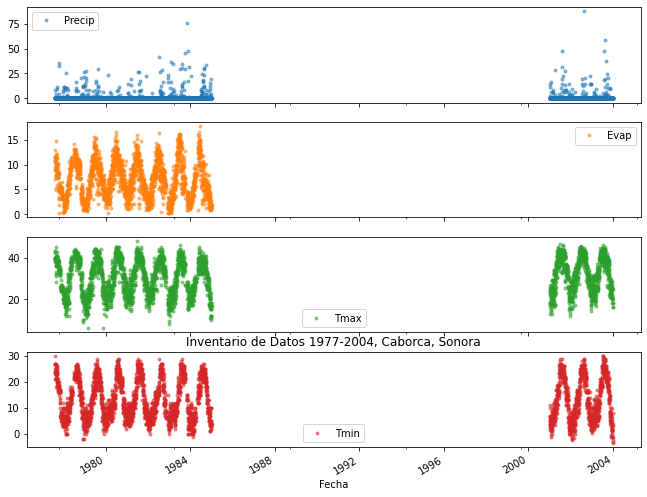

In [ ]:
# Visualizamos la colección de los datos y veremos si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_T[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1977-2004, Caborca, Sonora');

**Actividad 1**
 Explora tus datos de Precipitación los últimos años 1990- fin de datos.

* Grafica todo el rango de datos utilizando la función **df.plot()**
* Analiza un año específico completo, utiliza la función **df.loc()** para seleccionar el rango de datos. 
* Grafica la estacionalidad de tus datos por mes utilizando la función **sns.barplot()** 

Variación en Precipitación promedio 15_2-15 : 0.09109293361732673
Variación en Precipitación promedio T-15_2 : -0.0639435698963211


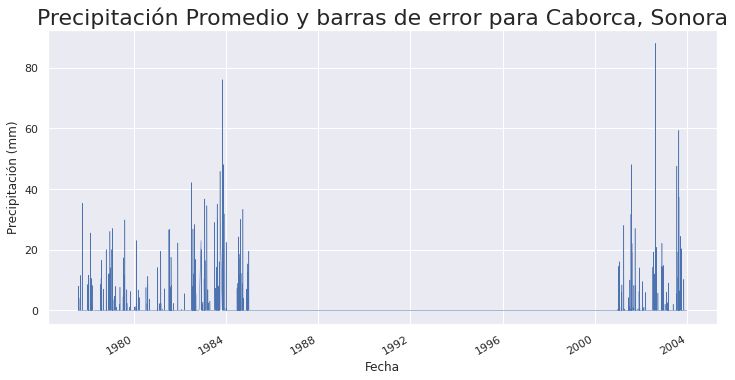

In [ ]:
# Ahora graficamos la Precipitación de los últimos 12 años (1992-hasta 2004)
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos algunos promedios de cada época de ~ 30 años
Precip_ave_T = df_T.Precip.mean()
Precip_ave_15_2 = df_15_2.Precip.mean()
Precip_ave_15 = df_15.Precip.mean()

# Graficamos la precipitación de la epoca T a la actualidad
df_T['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación Promedio y barras de error para Caborca, Sonora', fontsize=22)

# Calculamos diferencias de los promedios de precipitación
print('Variación en Precipitación promedio 15_2-15 :', Precip_ave_15_2-Precip_ave_15)
print('Variación en Precipitación promedio T-15_2 :', Precip_ave_T-Precip_ave_15_2)

Text(0.5, 1.0, 'Precipitacion en 2002 en Caborca, Sonora')

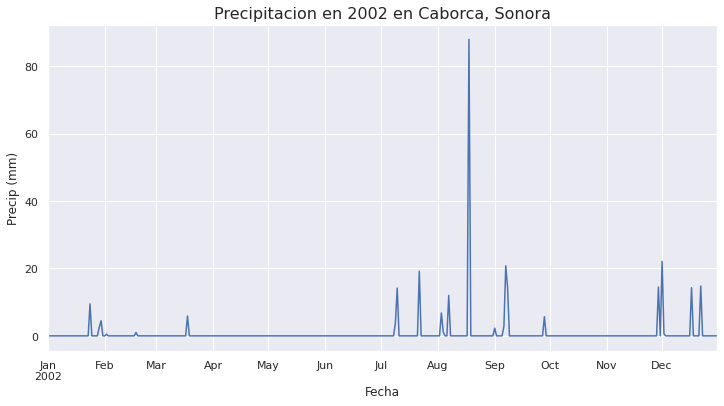

In [ ]:
# Investigamos un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_15_2.loc['2002', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');
ax.set_title("Precipitacion en 2002 en Caborca, Sonora", size=16)

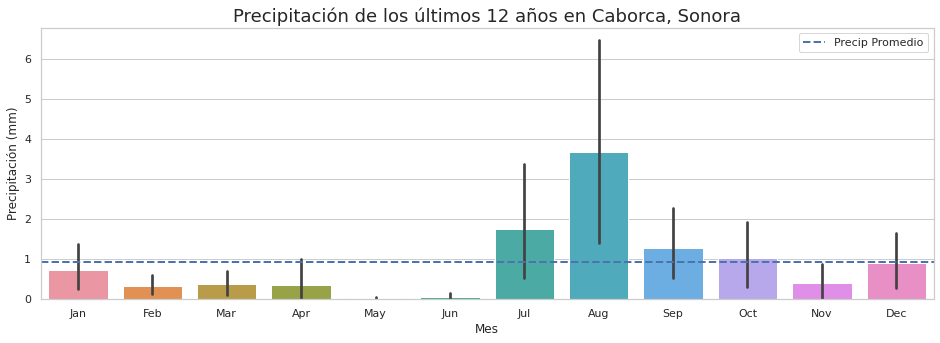

In [ ]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))

# Promedio de Precipitación
Precip_m=df_15_2.Precip.mean()

# Gráfica de cajas
sns.barplot(x='Mes', y='Precip', data=df_15_2)

# Líneas de la Precipitación promedio
plt.axhline(Precip_m, color='b', linestyle='--', linewidth=2, label=f'Precip Promedio');
plt.legend();
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación de los últimos 12 años en Caborca, Sonora', fontsize=18)

plt.show()

#**Actividad 2** 
Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

* Grafica todo el rango de datos utilizando la función **df.plot()**, incluye una línea punteada mostrando el promedio. 
* Analiza un año específico completo para las dos Temperaturas, con apoyo de la función **df.loc()** 
* Grafica la estacionalidad filtrando tus datos por mes y utilizando la función **sns.boxplot()**, incluye una línea punteada mostrando el promedio.

Variación ºC Tmax promedio 15_2s-15s : 2.1160307446456628


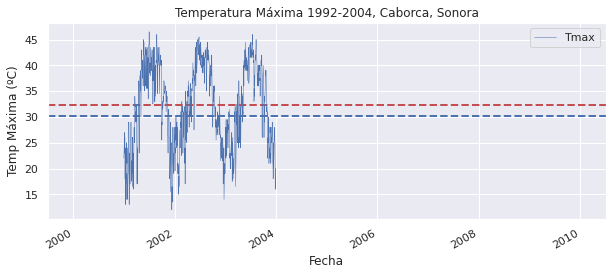

In [ ]:
# Graficamos la Tmax de los últimos 12 años (1992-hasta 2004)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(10, 4)})

# Cálculo de promedios
Tmax_ave_15_2 = df_15_2.Tmax.mean()
Tmax_ave_15 = df_15.Tmax.mean()

# Graficar líneas promedios (rojo 1990-2017, azul 1960-1989)
plt.axhline(Tmax_ave_15_2, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_15, color = 'b', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_15_2['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1992-2004, Caborca, Sonora')

plt.legend();

# Imprime la diferencia de Temperaturas promedio entre épocas 
print('Variación ºC Tmax promedio 15_2s-15s :', Tmax_ave_15_2-Tmax_ave_15)

Variación ºC Tmin promedio 15_2s-15s : 0.3057473463429847


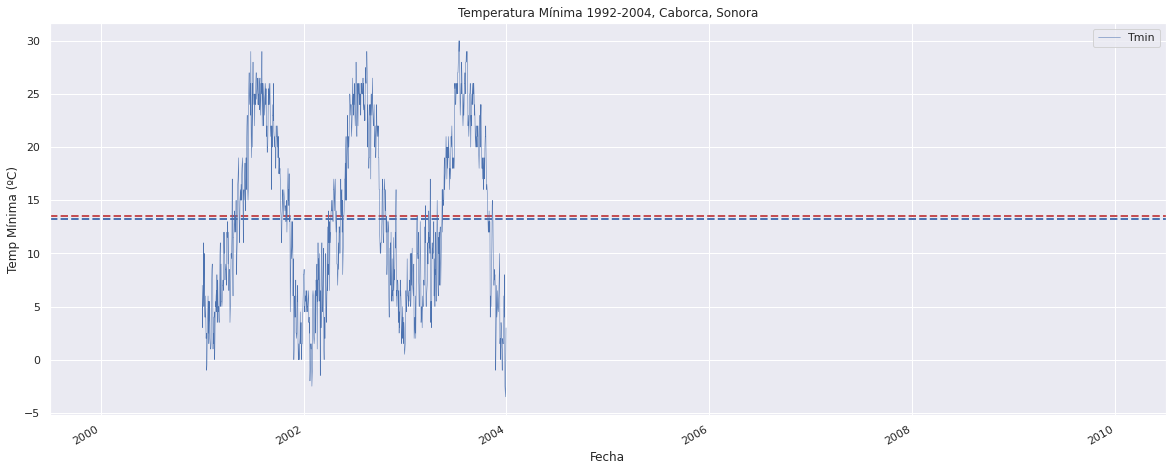

In [ ]:
# Hacemos lo mismo que la gráfica anterior con la Tmin
# Graficamos la Tmin de los últimos 15_2 años (1992-hasta 2004)
sns.set(rc={'figure.figsize':(20, 8)})

Tmin_ave_15_2 = df_15_2.Tmin.mean()
Tmin_ave_15 = df_15.Tmin.mean()

plt.axhline(Tmin_ave_15_2, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_15, color = 'b', linestyle='--', linewidth=2);

df_15_2['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1992-2004, Caborca, Sonora')

plt.legend();



print('Variación ºC Tmin promedio 15_2s-15s :', Tmin_ave_15_2-Tmin_ave_15)

Text(0.5, 1.0, 'Temperatura Maxima en 2002, Caborca, Sonora')

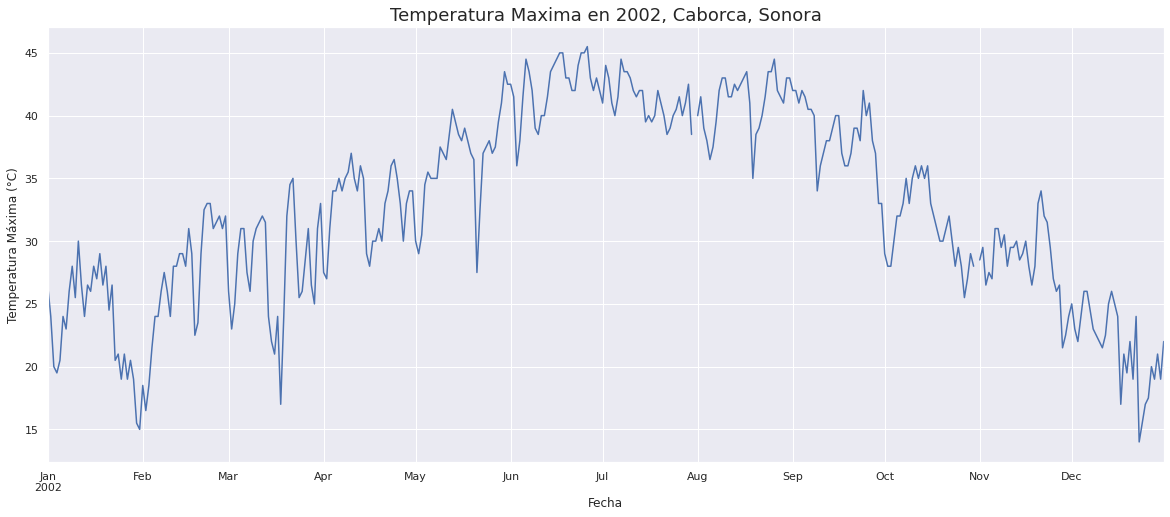

In [ ]:
# Investigando un año de datos
ax = df_15_2.loc['2002', 'Tmax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');
ax.set_title("Temperatura Maxima en 2002, Caborca, Sonora", size=18)

Text(0.5, 1.0, 'Temperatura minima en 2002, Caborca, Sonora')

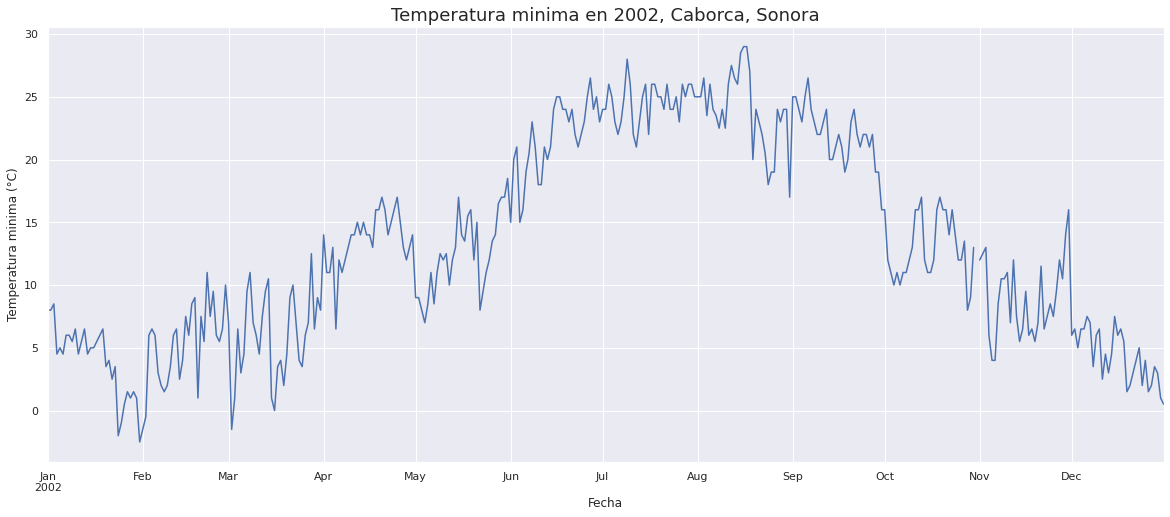

In [ ]:
# Investigando un año de datos
ax = df_15_2.loc['2002', 'Tmin'].plot()
ax.set_ylabel('Temperatura minima (°C)');
ax.set_title("Temperatura minima en 2002, Caborca, Sonora", size=18)

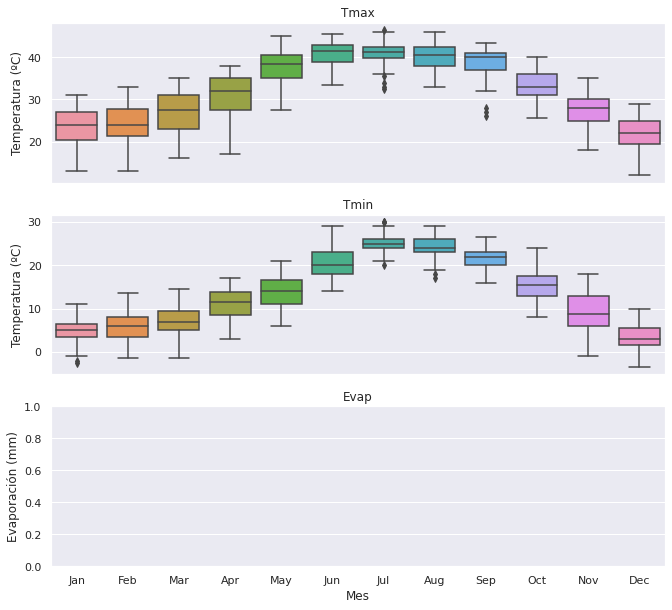

In [ ]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_15_2, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temperatura (ºC)')
  else: 
    ax.set_ylabel('Evaporación (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#**Actividad 3**
Realiza el mismo análisis que en la Actividad 2, pero ahora para la variable de **Evaporación**

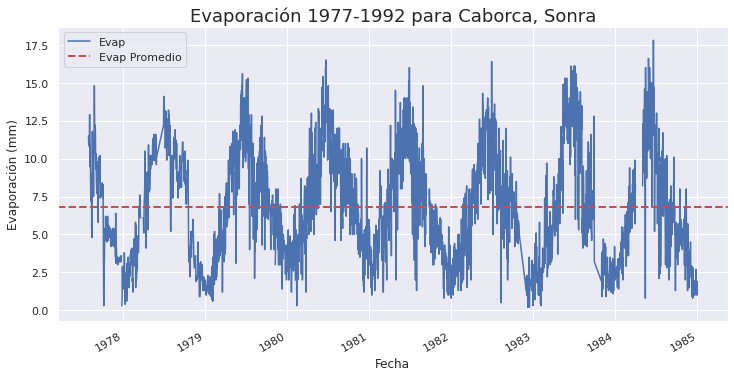

In [ ]:
#Graficamos la Evaporación de 1977-1992, ya que en ese rango solo existen valores de evaporacion (mas bien hasta 1984/12/31)
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Investigando datos para Evaporación
ax = df_15.Evap.plot()
ax.set_ylabel('Evaporación (mm)');
ax.set_title('Evaporación 1977-1992 para Caborca, Sonra', size=18);

# Cálculo de promedios
Evap_ave_15 = df_15.Evap.mean()

# Graficar líneas promedios
plt.axhline(Evap_ave_15,color='r', linestyle='--', linewidth=2, label=f'Evap Promedio');
plt.legend();

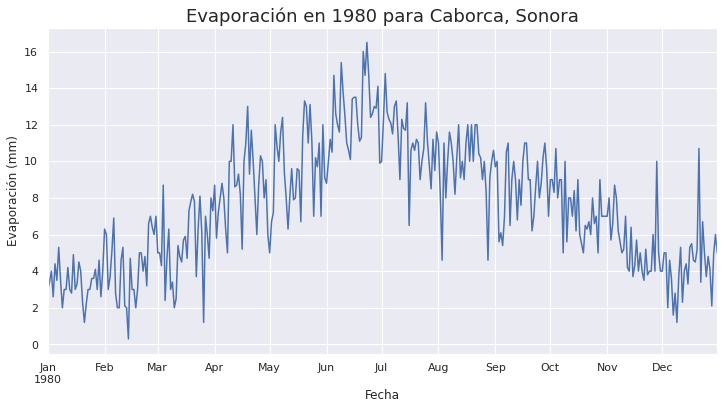

In [ ]:
# Realizamos la misma gráfica para un año en específico
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Investigando un año de datos para Evaporación
ax = df_15.loc['1980', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');
ax.set_title('Evaporación en 1980 para Caborca, Sonora', size=18);

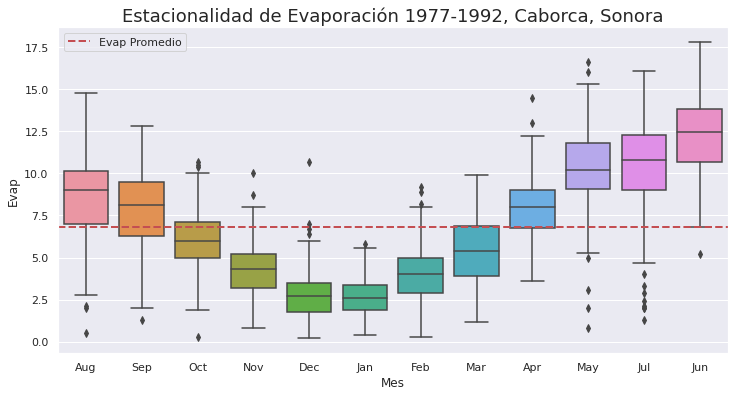

In [ ]:
# Realizamos una grafica con la estacionalidad de los datos, filtrados por mes de los primeros 15 años
sns.boxplot(data=df_15, x='Mes', y='Evap');
plt.axhline(Evap_ave_15,color='r', linestyle='--', linewidth=2, label='Evap Promedio');

# Etiquetas                      
plt.legend(loc='best');
plt.title('Estacionalidad de Evaporación 1977-1992, Caborca, Sonora', size=18);

#**Actividad 4**  
Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función **df.rolling()**. Explora tus datos:

* Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 
* Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días

In [ ]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
#Dado el problema de los datos faltantes la evaporacion se tomara en cuenta en los primeros 15 años.


data_cols = ['Evap', 'Tmax', 'Tmin']
df_15_7d = df_15[data_cols].rolling(7, center=True).mean()
df_15_30d = df_15[data_cols].rolling(30, center=True).mean()
df_15_365d = df_15[data_cols].rolling(365, center=True).mean()

df_15_7d

,Evap,Tmax,Tmin
Fecha,,,
1977-08-01,NaN,NaN,NaN
1977-08-02,NaN,NaN,NaN
1977-08-03,NaN,NaN,NaN
1977-08-04,11.228571,41.000000,26.285714
1977-08-05,11.142857,40.857143,25.857143
...,...,...,...
1984-12-27,1.528571,17.142857,5.857143
1984-12-28,1.642857,17.357143,5.857143
1984-12-29,NaN,NaN,NaN


In [ ]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_15_7d = df_15[data_cols].rolling(7, center=True).mean()
df_15_30d = df_15[data_cols].rolling(30, center=True).mean()
df_15_365d = df_15[data_cols].rolling(365, center=True).mean()

df_15_365d

,Evap,Tmax,Tmin
Fecha,,,
1977-08-01,NaN,NaN,NaN
1977-08-02,NaN,NaN,NaN
1977-08-03,NaN,NaN,NaN
1977-08-04,NaN,NaN,NaN
1977-08-05,NaN,NaN,NaN
...,...,...,...
1984-12-27,NaN,NaN,NaN
1984-12-28,NaN,NaN,NaN
1984-12-29,NaN,NaN,NaN


#**EXTRAÑO** 

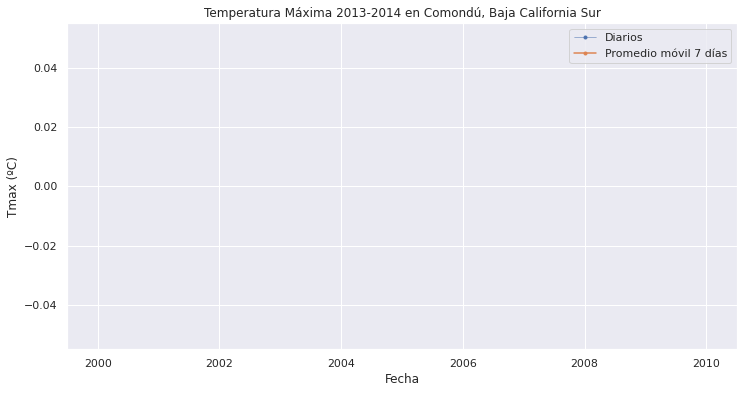

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2001-01', '2003-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_15.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_15_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2013-2014 en Comondú, Baja California Sur')
ax.legend();